In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
from scipy import stats, misc
import numpy.matlib

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

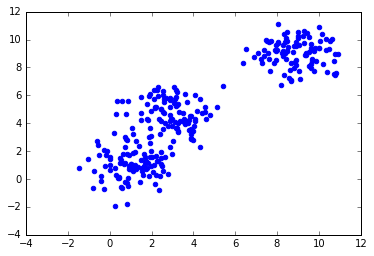

In [17]:
group1 = np.random.multivariate_normal(np.array([1, 1]), np.eye(2), 100) 
group2 = np.random.multivariate_normal(np.array([3, 5]), np.eye(2), 100) 
group3 = np.random.multivariate_normal(np.array([9, 9]), np.eye(2), 100)

data = np.concatenate((group1, group2, group3), 0).transpose()

plt.scatter(data[0, :], data[1, :], color = 'b')
plt.show()

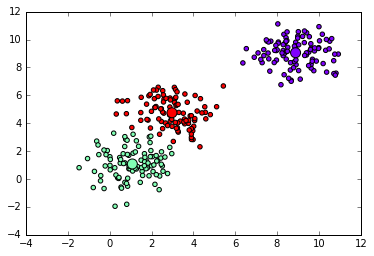

In [18]:
# number of cluster and data
    
ncluster = 3
ndata = 300

#randomly initialize 100 times

C = np.zeros((100, ))
MU = np.zeros((100, ))

for i in range(0,100):
    #select random index
    r = ndata * np.random.rand(3,1)
    r = r.astype(int)[:,0]
    
    mu = data[:, r]
    
    pre_mu = mu
    #run k - means
    for run in range(0,50):
        #cluster assignment
        distance = np.zeros((ncluster, ndata))
        for k in range(0, ncluster):
            distance[k, :] = np.sum((data - np.array([mu[:, k]]).transpose())**2, axis = 0)
                
        c = distance.argmin(axis = 0)
        # move centroid 
       
        for k in range(0, ncluster):
            mu[:, k] = np.mean(data[:, c == k], axis = 1)
            

        if np.sum(np.abs(pre_mu - mu)) < 10 **(-5):
            break;
        else:
            pre_mu = mu
    #compute cost
    cost = 0
    for j in range(0, ncluster):
        cost = cost + np.sum((data[:, c == j] - np.array([mu[:, j]]).transpose())**2)
    
    # find minumun cost and corresponding mu and c
    if i == 0:
        C = c
        J = cost
        MU = mu
    elif cost < J:
        J = cost
        C = c
        MU = mu

plt.scatter(data[0, :], data[1, :], c = C, cmap = 'rainbow')
plt.scatter(MU[0, :], MU[1, :], marker = 'o', s=100, c = np.arange(ncluster), cmap = 'rainbow')        
plt.show()

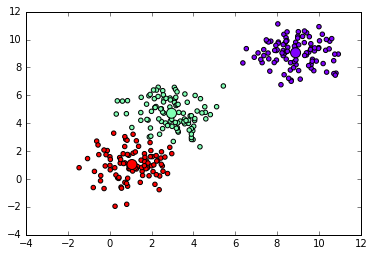

In [19]:
def kmeans_step(frame = 0, ncluster = 3 ):   
    
    ndata = 300

    #select random index
    rng = np.random.RandomState(2)
    center = rng.randn(2, ncluster)
    c = np.zeros(ndata)
    nstep = frame
    for i in range(nstep+1):
        #cluster assignment
        old_center = center

        distance = np.zeros((ncluster, ndata))
        for k in range(0, ncluster):
            distance[k, :] = np.sum((data - np.array([center[:, k]]).transpose())**2, axis = 0)

        c = distance.argmin(axis = 0)
        # move centroid 

        for k in range(0, ncluster):
            center[:, k] = np.mean(data[:, c == k], axis = 1)
        
        nan = np.isnan(center)
        center[nan] = old_center[nan]

    plt.scatter(data[0, :], data[1, :], c = c, cmap = 'rainbow')
    plt.scatter(center[0, :], center[1, :], marker = 'o', s=100, c = np.arange(ncluster), cmap = 'rainbow')

    
from IPython.html.widgets import interact
interact(kmeans_step, frame=[0, 40], ncluster = [1, 6])

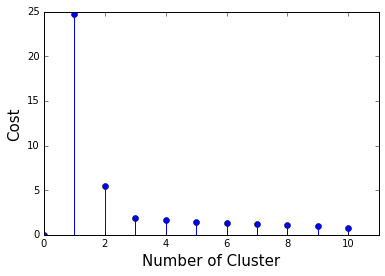

In [15]:
Q = np.zeros((11, ))
for K in range(1, 11):

    # number of cluster and data

    ncluster = K
    ndata = 300

    #randomly initialize 100 times

    C = np.zeros((100, ))
    MU = np.zeros((100, ))

    for i in range(0,10):
        #select random index
        r = ndata * np.random.rand(ncluster,1)
        r = r.astype(int)[:,0]

        mu = data[:, r]

        pre_mu = mu
        #run k - means
        for run in range(0,5):
            #cluster assignment
            distance = np.zeros((ncluster, ndata))
            for k in range(0, ncluster):
                distance[k, :] = np.sum((data - np.array([mu[:, k]]).transpose())**2, axis = 0)

            c = distance.argmin(axis = 0)
            # move centroid 

            for k in range(0, ncluster):
                mu[:, k] = np.mean(data[:, c == k], axis = 1)


            if np.sum(np.abs(pre_mu - mu)) < 10 **(-5):
                break;
            else:
                pre_mu = mu
        #compute cost
        cost = 0
        for j in range(0, ncluster):
            cost = cost + np.sum((data[:, c == j] - np.array([mu[:, j]]).transpose())**2)
        cost = cost/ndata
        # find minumun cost and corresponding mu and c
        if i == 0:
            C = c
            J = cost
            MU = mu
        elif cost < J:
            J = cost
            C = c
            MU = mu
    Q[K] = J
  
plt.stem(Q, 'b')
plt.xlim([0, 11])
plt.xlabel('Number of Cluster',fontsize = 15)
plt.ylabel('Cost',fontsize = 15)
plt.show()

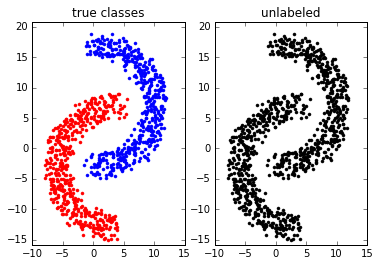

In [41]:
r = 10
x1c = np.array([-2, 5])
x2c = np.array([2, -5])

theta = np.array([np.linspace(-np.pi/2, np.pi/2, 500)]).T
x1 = x1c[0] + r*np.cos(theta)
y1 = x1c[1] + r*np.sin(theta)
x2 = x2c[0] + r*np.cos(theta+np.pi)
y2 = x2c[1] + r*np.sin(theta)

noise = 4

m = np.shape(theta)[0]

x1 = x1 + noise*np.random.rand(m,1)
y1 = y1 + noise*np.random.rand(m,1)
x2 = x2 + noise*np.random.rand(m,1)
y2 = y2 + noise*np.random.rand(m,1)

X1 = np.concatenate((x1, y1), 1)
X2 = np.concatenate((x2, y2), 1)
X = np.concatenate((X1, X2), 0)

plt.subplot(121)
plt.plot(x1, y1, 'b.')
plt.plot(x2, y2, 'r.')
plt.title('true classes')
plt.axis('equal')
plt.subplot(122)
plt.plot(X[:,0], X[:,1], 'k.')
plt.title('unlabeled')
plt.axis('equal')
plt.show()

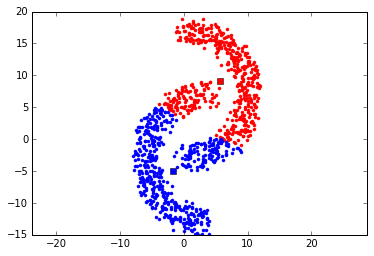

In [54]:
from sklearn.cluster import KMeans
est = KMeans(2)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
mu = est.cluster_centers_
plt.plot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 'r.')
plt.plot(mu[0,0], mu[0,1], 'rs')
plt.plot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 'b.')
plt.plot(mu[1,0], mu[1,1], 'bs')
plt.axis('equal')
plt.show()